In [ ]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers - Mall_Customers - Mall_Customers - Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x=df.iloc[:,[3,4]].values
y=df.iloc[:,3].values


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

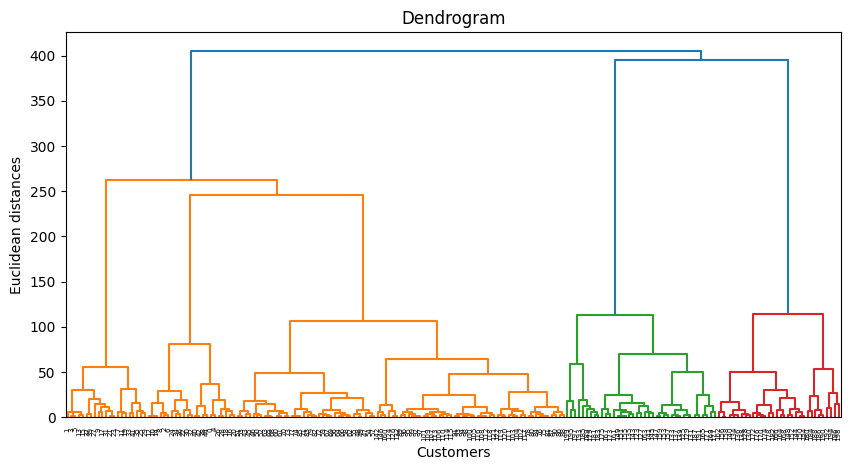

In [ ]:
plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc=AgglomerativeClustering(n_clusters=3)
y_hc=hc.fit_predict(x)

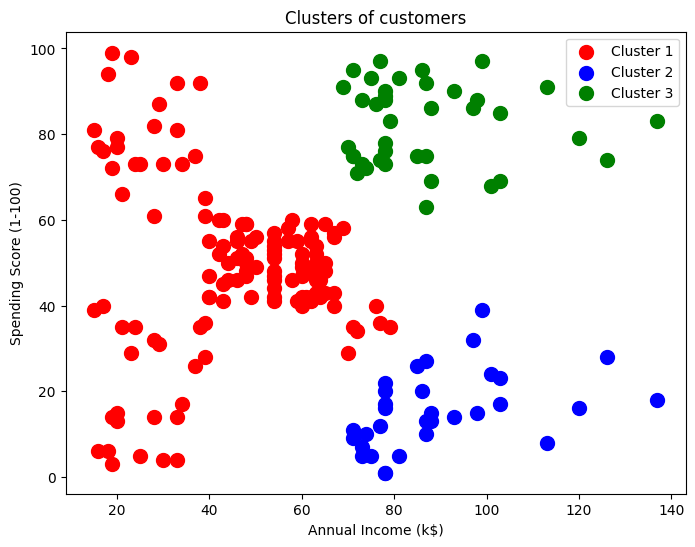

In [ ]:
# define  colore fro clusters
colors=['red','blue','green','cyan','magenta']

# plot clusters dynamic
plt.figure(figsize=(8,6))
for i in range(len(set(y_hc))):
    plt.scatter(x[y_hc==i,0],x[y_hc==i,1],
                s=100,c=colors[i],label='Cluster {}'.format(i+1))

# add titles and labels
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
?

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, y_hc)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4618340266628975


In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(x, y_hc)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.7068435076376502
